## The sheet compares the performance of Gemni flash and open ai turbo models for Kuhn Poker games

In [ ]:
#OPEN AI 

from games.khun_poker import KuhnPoker
from utils.global_functions import save_json
from evaluation.game_server import GameServer

OPEN_AI_KEY= ""
# Initialize game and model config
game = KuhnPoker(deck=[1, 2, 3], pot=2.0)
model_config = [
    {"model": "gpt-3.5-turbo", "api_key": OPEN_AI_KEY},
    {"model": "gpt-3.5-turbo", "api_key": OPEN_AI_KEY}
]

# Create and run GameServer
server = GameServer(game=game, model_config=model_config, player_num=2)
results = server.run(rounds=50, output_file="raw_results/kuhn_poker_open_ai_turbo.json")

# Print results
for res in results:
    print(f"Round {res['round_id']}: Actions {res['actions']}, Rewards {res['rewards']}")


In [ ]:
#GEMINI

from games.khun_poker import KuhnPoker
from utils.global_functions import save_json
from evaluation.game_server import GameServer

GEMNI_AI_KEY= ""
# Initialize game and model config
game = KuhnPoker(deck=[1, 2, 3], pot=2.0)
model_config = [
    {"model": "gemini-1.5-flash-8b", "api_key": GEMNI_AI_KEY},
    {"model": "gemini-1.5-flash-8b", "api_key": GEMNI_AI_KEY}
]

# Create and run GameServer
server = GameServer(game=game, model_config=model_config, player_num=2)
results = server.run(rounds=50, output_file="raw_results/kuhn_poker_gemini_flash.json")

# Print results
for res in results:
    print(f"Round {res['round_id']}: Actions {res['actions']}, Rewards {res['rewards']}")



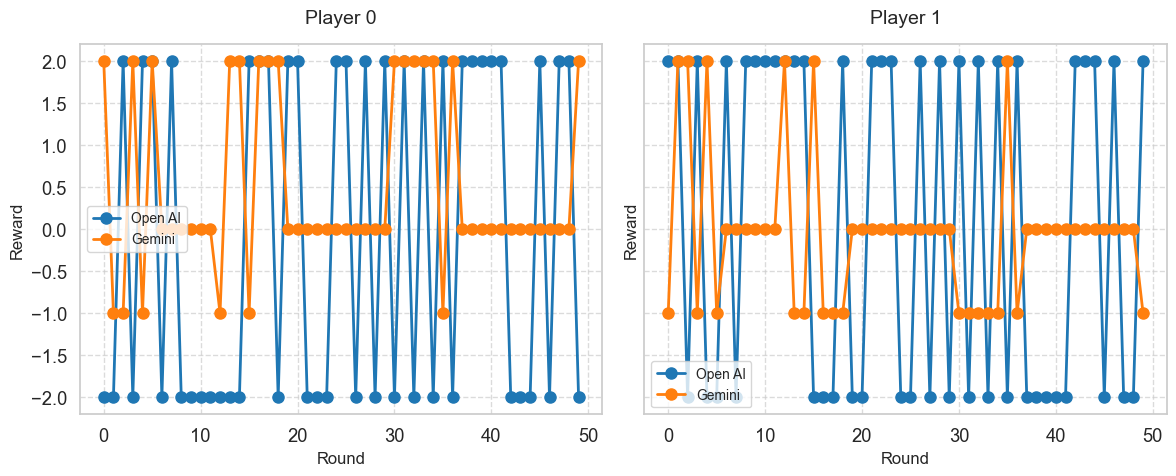

In [2]:
from evaluation.analysis import Analysis
from games.khun_poker import KuhnPoker
game = KuhnPoker(deck=[1, 2, 3], pot=2.0)
analysis = Analysis(game)

analysis = Analysis(game)
analysis.add("raw_results/kuhn_poker_open_ai_turbo.json", "Open AI")
analysis.add("raw_results/kuhn_poker_gemini_flash.json", "Gemini")


# Plot online comparison (rewards over rounds)
analysis.plot_comparison(models=["Open AI", "Gemini"], mode="online")